In [1]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [2]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [3]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

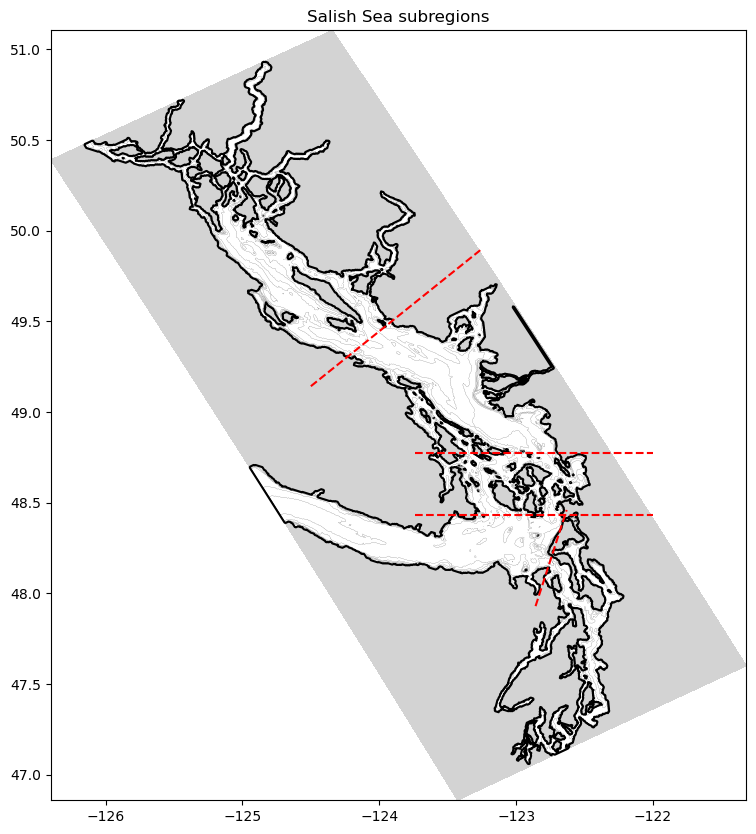

In [4]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [5]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

Source = pd.read_csv('Outfall_deploy.csv')
Source = Source.rename(columns={'Lat': 'lat', 'Lon': 'lon'})

In [6]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro2','NSoG','CSSoG','Haro','Rosario']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)&(data['lon']<-123)]
    elif area=='Rosario':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123)]
    elif area=='Haro2':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

In [7]:
area = mask.e1t*mask.e2t
puget_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_area= area.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_area = area.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_area = area.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + area.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_area={'Puget':puget_area,'JdF':jdf_area,'Haro2':haro2_area,'NSoG':NSoG_area,'CSSoG':CSSog_area}


In [8]:
puget_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_vol= mask.volume.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_vol = mask.volume.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_vol = mask.volume.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + mask.volume.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_vol={'Puget':puget_vol,'JdF':jdf_vol,'Haro2':haro2_vol,'NSoG':NSoG_vol,'CSSoG':CSSog_vol}



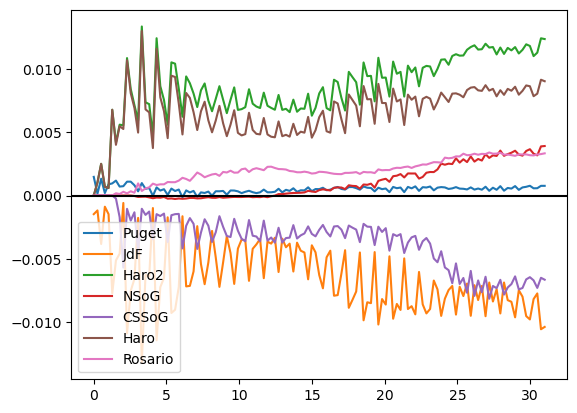

In [9]:
fig = plt.figure()
alpha='5,000 s'
Source['deploy']=round((Source.Population*250*10)/(1e7/runs[alpha][1]),0)
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
deploy_tot = Source.deploy.sum()
for area in sub_areas:
    DSn = cutting(DS,area)
    deploys = cutting(Source,area).deploy.sum()
    count = []
    depcount = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        depcount.append((times/3600)//10)
        count.append(len(DSn[DSn.time == times]))
        exchange = (np.array(count)-((np.array(depcount)+1)*deploys))/(deploy_tot*(np.array(depcount)+1))
    plt.plot(x,exchange,label=area)
plt.legend()
plt.axhline(y=0,color='k')
plt.show()

In [86]:
ds = xr.open_dataset(path_runs+months['Aug'][0], decode_times=False)
sizeds = ds.dims['obs']-1
x = np.linspace(0,31,sizeds)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
DS = DS[DS.status==10]

In [27]:
# # ##Counting total particles exported compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(sub_areas)])
# exchange_array[:,:] = np.nan
# mean_ex = []
# std_ex = []
# for month in months:
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==1]
#     deploy_tot = Source.deploy.sum()
#     meane = []
#     means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,j]=exchange
#         meane.append(np.mean(exchange))
#         means.append(np.std(exchange))
#     mean_ex.append(meane)
#     std_ex.append(means)
# np.save('test_array.npy',exchange_array)

In [10]:
# # ##Counting total particles sedimented compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(sub_areas)])
# exchange_array[:,:] = np.nan
# mean_ex = []
# std_ex = []
# for month in months:
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==1]
#     deploy_tot = Source.deploy.sum()
#     meane = []
#     means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,j]=exchange
#         meane.append(np.mean(exchange))
#         means.append(np.std(exchange))
#     mean_ex.append(meane)
#     std_ex.append(means)
# np.save('test_array.npy',exchange_array)

In [11]:
# # ##Counting total particles sedimented compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(sub_areas)])
# exchange_array[:,:] = np.nan
# mean_ex = []
# std_ex = []
# for month in months:
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==3]
#     deploy_tot = Source.deploy.sum()
#     meane = []
#     means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,j]=exchange
#         meane.append(np.mean(exchange))
#         means.append(np.std(exchange))
#     mean_ex.append(meane)
#     std_ex.append(means)
# np.save('sedimented_array.npy',exchange_array)

In [12]:
# # ##Counting total particles beached compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(sub_areas)])
# exchange_array[:,:] = np.nan
# mean_ex = []
# std_ex = []
# for month in months:
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==2]
#     deploy_tot = Source.deploy.sum()
#     meane = []
#     means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,j]=exchange
#         meane.append(np.mean(exchange))
#         means.append(np.std(exchange))
#     mean_ex.append(meane)
#     std_ex.append(means)
# np.save('beached_array.npy',exchange_array)

In [13]:
# ##Counting total particles compared to sources in subregions

# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(sub_areas)])
# exchange_array[:,:] = np.nan
# mean_ex = []
# std_ex = []
# for month in months:
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     deploy_tot = Source.deploy.sum()
#     meane = []
#     means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count)-((np.array(depcount)+1)*deploys))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,j]=exchange
#         meane.append(np.mean(exchange))
#         means.append(np.std(exchange))
#     mean_ex.append(meane)
#     std_ex.append(means)
# #plt.errorbar(month,np.mean(exchange),np.std(exchange),linestyle='-',marker='.')

In [72]:
exchange_array=np.load('export_array.npy')
export=(np.diff(exchange_array[:92,:]))

for i,sub_areass in enumerate(sub_areas):
    export  = np.diff(exchange_array[:92,i])
    export[export<0]=0
    print('Mean exported to PO from '+sub_areass, np.nanmean(export)*100)
    print('Std Exported to PO from '+sub_areass, np.nanstd(export)*100)

Mean exported to PO from Puget nan
Std Exported to PO from Puget nan
Mean exported to PO from JdF 0.0008125119050842824
Std Exported to PO from JdF 0.001394564823660677
Mean exported to PO from Haro2 nan
Std Exported to PO from Haro2 nan
Mean exported to PO from NSoG nan
Std Exported to PO from NSoG nan
Mean exported to PO from CSSoG nan
Std Exported to PO from CSSoG nan
Mean exported to PO from Haro nan
Std Exported to PO from Haro nan
Mean exported to PO from Rosario nan
Std Exported to PO from Rosario nan


/tmp/ipykernel_1732135/1666738546.py:8: RuntimeWarning: Mean of empty slice
  print('Mean exported to PO from '+sub_areass, np.nanmean(export)*100)
/home/jvalenti/conda_envs/Parcels_25/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [14]:
exchange_array=np.load('test_array.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean beached from '+sub_areass, np.nanmean(exchange_array[:,i])*100)
    print('Std beached from '+sub_areass, np.nanstd(exchange_array[:,i])*100)

Mean beached from Puget 22.502358582636763
Std beached from Puget 8.196416132672214
Mean beached from JdF 2.913017518627514
Std beached from JdF 0.9006796703769762
Mean beached from Haro2 1.630207798052605
Std beached from Haro2 0.5624051988844514
Mean beached from NSoG 0.8587685936935201
Std beached from NSoG 0.2450077002232777
Mean beached from CSSoG 22.950858153600716
Std beached from CSSoG 7.482909722546458
Mean beached from Haro 1.0922386745255566
Std beached from Haro 0.3032328256966647
Mean beached from Rosario 0.5379691235270487
Std beached from Rosario 0.370159073398885


In [15]:
exchange_array=np.load('sedimented_array.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean sedimented from '+sub_areass, np.nanmean(exchange_array[:,i])*100)
    print('Std sedimented from '+sub_areass, np.nanstd(exchange_array[:,i])*100)

Mean beached from Puget 14.092669438299913
Std beached from Puget 5.5970280683750735
Mean beached from JdF 1.1417797409943642
Std beached from JdF 0.45453729925634667
Mean beached from Haro2 1.7616691010477354
Std beached from Haro2 0.5462833986614777
Mean beached from NSoG 0.5084093476717055
Std beached from NSoG 0.23476739339305472
Mean beached from CSSoG 17.262540762101374
Std beached from CSSoG 6.441407730473727
Mean beached from Haro 0.4607158074034231
Std beached from Haro 0.23371965277071183
Mean beached from Rosario 1.2960244353763075
Std beached from Rosario 0.33058631839185126


In [16]:
exchange_array=np.load('beached_array.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean beached from '+sub_areass, np.nanmean(exchange_array[:,i])*100)
    print('Std beached from '+sub_areass, np.nanstd(exchange_array[:,i])*100)

Mean beached from Puget 10.06199328533651
Std beached from Puget 2.6671810384001677
Mean beached from JdF 0.14077313226509358
Std beached from JdF 0.055738494468091364
Mean beached from Haro2 0.6325260120584758
Std beached from Haro2 0.2196685351569218
Mean beached from NSoG 0.25308992829795823
Std beached from NSoG 0.05206142249240635
Mean beached from CSSoG 3.1656254226132767
Std beached from CSSoG 1.2472186657387911
Mean beached from Haro 0.27281519249245195
Std beached from Haro 0.10040828366064558
Mean beached from Rosario 0.35971081956602374
Std beached from Rosario 0.12317925444396254


In [17]:
exchange_array=np.load('exchange_array2.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean exchange from '+sub_areass, np.nanmean(exchange_array[:,i])*100)
    print('Std exchange from '+sub_areass, np.nanstd(exchange_array[:,i])*100)

Mean exchange from Puget 0.0728450295768262
Std exchange from Puget 0.021141303064324497
Mean exchange from JdF -1.1538350279402636
Std exchange from JdF 0.41086977979401684
Mean exchange from Haro2 0.8231657958984513
Std exchange from Haro2 0.2903234223621263
Mean exchange from NSoG 0.03264037418224283
Std exchange from NSoG 0.050607397779316554
Mean exchange from CSSoG 0.22518382828274325
Std exchange from CSSoG 0.126318606599216
Mean exchange from Haro 0.7445718041388418
Std exchange from Haro 0.25634400802311597
Mean exchange from Rosario 0.07859399175960967
Std exchange from Rosario 0.07212044194833862


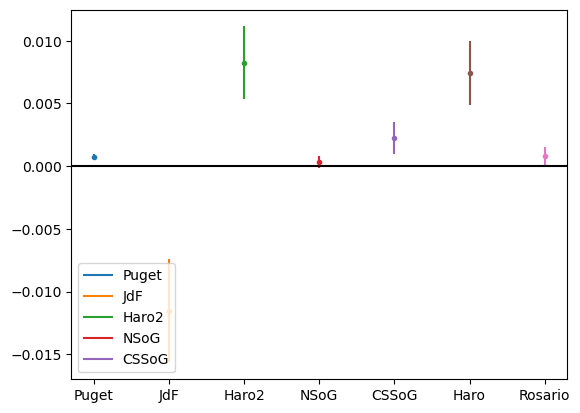

In [26]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

for i,sub_areass in enumerate(sub_areas):
    plt.errorbar(sub_areas[i],np.nanmean(exchange_array[:,i]),np.nanstd(exchange_array[:,i]),linestyle='-',marker='.')

legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
#plt.axhline(y=1,color='black')
plt.legend(legend_lines,sub_areas, loc = 'lower left')
plt.axhline(y=0,color='k')

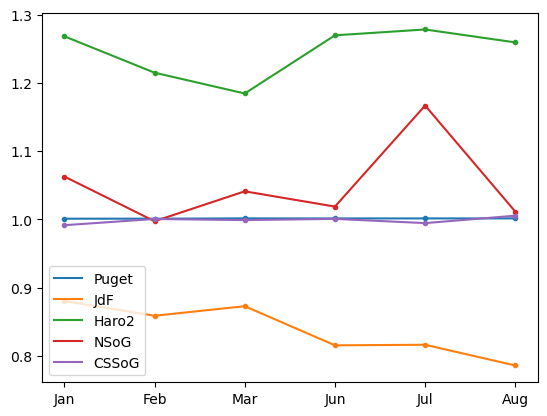

In [ ]:
fig = plt.figure()
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
mean_ex= np.array(mean_ex)
plt.plot(list(months.keys()),np.array(mean_ex),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
#plt.axhline(y=1,color='black')
plt.legend(legend_lines,sub_areas, loc = 'lower left')

In [12]:
alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}

### This checks budget vs $\alpha$

In [13]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(runs):
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(1e7/runs[alpha][1]),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*1e7/runs[alpha][1]-(np.array(depcount)+1)*deploys*1e7/runs[alpha][1])/(np.array(timer)))[-40:]
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

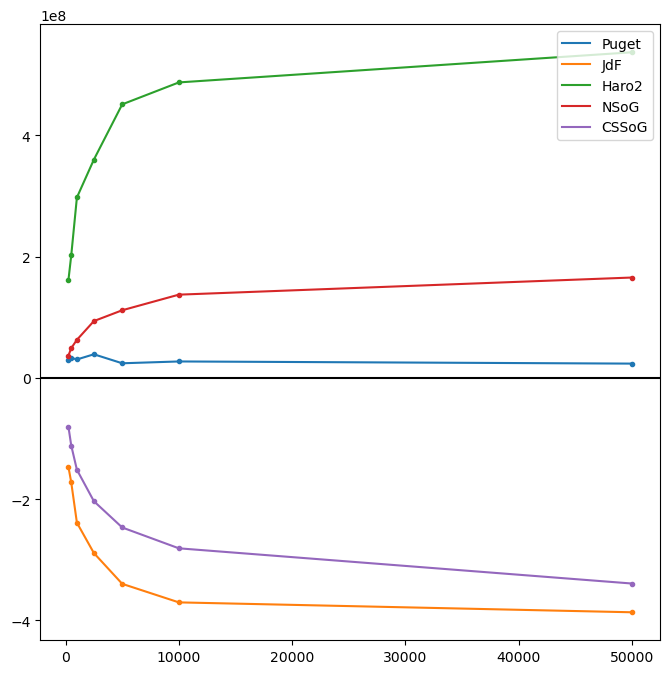

In [14]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
plt.plot(list(alphs.values()),meanll,linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

In [15]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(5e6),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*5e6-(np.array(depcount)+1)*deploys*5e6)/(np.array(timer)))
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

In [16]:
np.sum(np.array(meanll).T,axis=0)

array([ 4.54747351e-13, -5.11590770e-13,  1.70530257e-13,  1.25055521e-12,
       -9.09494702e-13,  4.54747351e-13])

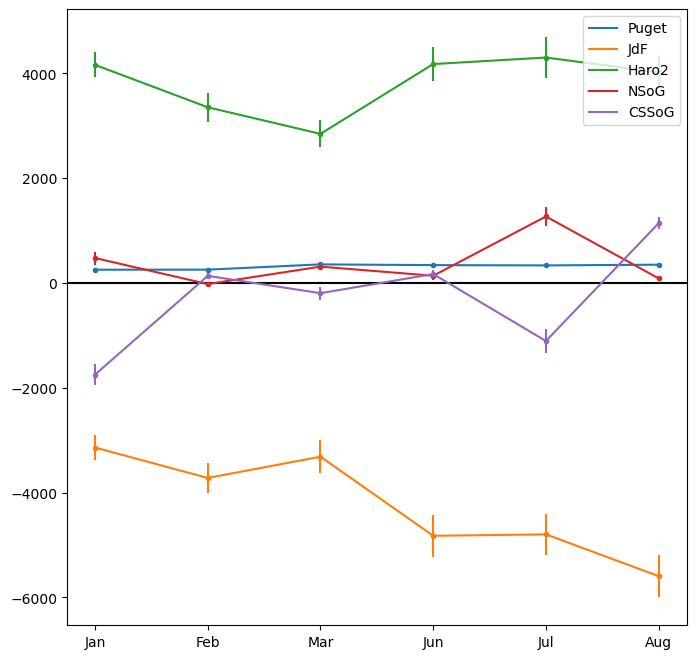

In [17]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
for i,area in enumerate(sub_areas):
    plt.errorbar(list(months.keys()),np.array(meanll).T[i],np.array(stdll).T[i]/len(stdll[0]),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

In [18]:
np.array(meanll).T[0]*13.7

array([3466.42136883, 3478.64083237, 4856.94857663, 4662.21611603,
       4591.1638094 , 4777.09947575])

In [19]:
sub_areas=['Puget','JdF','Haro','NSoG','CSSoG']

In [20]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(5e6),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*5e6-(np.array(depcount)+1)*deploys*5e6)/(np.array(timer)))
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

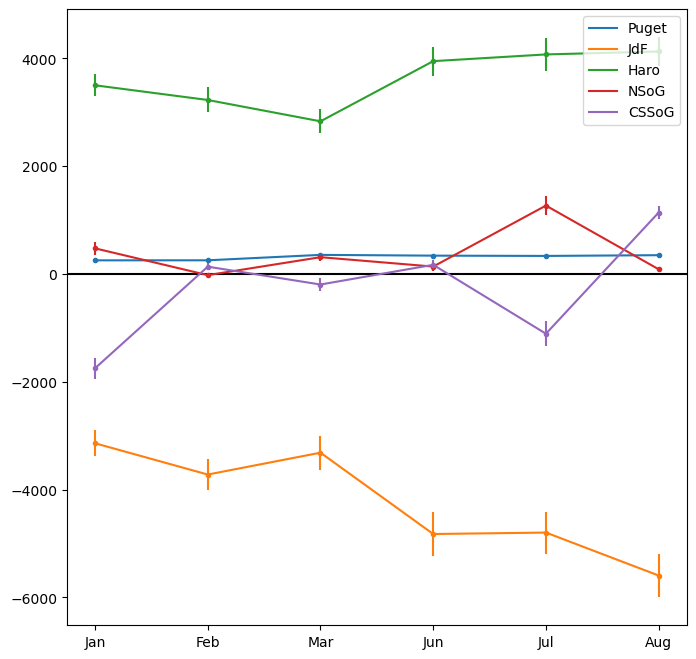

In [21]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
for i,area in enumerate(sub_areas):
    plt.errorbar(list(months.keys()),np.array(meanll).T[i],np.array(stdll).T[i]/len(stdll[0]),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

Parker's 2021 flow

In [22]:
meane = 40.9e3
df = 4.7e3
exch= np.linspace(meane+df,meane-df,8)
exch
#exch= list(exch[:3])+list(exch[-3:])
#np.array(meanll).T[0]*13.7/(np.array(exch))

array([45600.        , 44257.14285714, 42914.28571429, 41571.42857143,
       40228.57142857, 38885.71428571, 37542.85714286, 36200.        ])

In [23]:
ii,jj = finder(jjii,48.145078973929365, -122.75094025918668)

In [24]:
lim=10

for month in months:
    conc1 = np.load(path_runs+months[month][0].split('.')[0]+'.npy')*13.7
    limdep = mask.gdept_0[0,:,0,0].values
    limn = np.where(limdep>lim)[0][0]-1
    zdep = round(limdep[limn],2)
    print(f'checking for depth = {zdep}')
    admirup = conc1[:limn,int(ii/3),:]
    admirdeep = conc1[limn:,int(ii/3),:]
    weightsup = mask.e3t_0[0,:limn,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:limn,int(ii/3),::3].values,axis=0)
    weightsdeep = mask.e3t_0[0,limn:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,limn:,int(ii/3),::3].values,axis=0)
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {month} upper vs lower {-np.average(admirup[mask.tmask[0,:limn,ii,::3]==1],weights=weightsup[mask.tmask[0,:limn,ii,::3]==1])+np.average(admirdeep[mask.tmask[0,limn:,ii,::3]==1],weights=weightsdeep[mask.tmask[0,limn:,ii,::3]==1])}')

checking for depth = 9.5
Difference in Jan upper vs lower 0.008828478460783773
checking for depth = 9.5
Difference in Feb upper vs lower 0.012019580577336708
checking for depth = 9.5
Difference in Mar upper vs lower 0.04418745082499492
checking for depth = 9.5
Difference in Jun upper vs lower 0.12019632437078806
checking for depth = 9.5
Difference in Jul upper vs lower 0.05280445116623003
checking for depth = 9.5
Difference in Aug upper vs lower 0.010593266971856585


In [25]:
month = {'Jan':1,'Feb':2,'Mar':3,'Jun':6,'Jul':7,'Aug':8}
for m in month:
    v = xr.open_dataset('/results/SalishSea/month-avg.201905/'+'SalishSea_1m_20190'+str(month[m])+'_20190'+str(month[m])+'_grid_V.nc', decode_times=False).vomecrty
    conc1 = np.load(path_runs+months[m][0].split('.')[0]+'.npy')*13.7
    admir = conc1[:,int(ii/3),:]
    admirout = admir[v[0,:,int(ii/3),::3]>0]
    admirin= admir[v[0,:,int(ii/3),::3]<0]

    weights = mask.e3t_0[0,:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:,int(ii/3),::3].values,axis=0)
    weightsin = weights[v[0,:,int(ii/3),::3]<0]
    weightsout = weights[v[0,:,int(ii/3),::3]>0]
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {m} upper vs lower {np.average(admirin,weights=weightsin)+np.average(admirout,weights=weightsout)}')

Difference in Jan upper vs lower 0.01838382150202309
Difference in Feb upper vs lower 0.015560438154672085
Difference in Mar upper vs lower 0.029773328510979656
Difference in Jun upper vs lower 0.006782790973645338
Difference in Jul upper vs lower 0.02504564985799839
Difference in Aug upper vs lower 0.015739647896920093


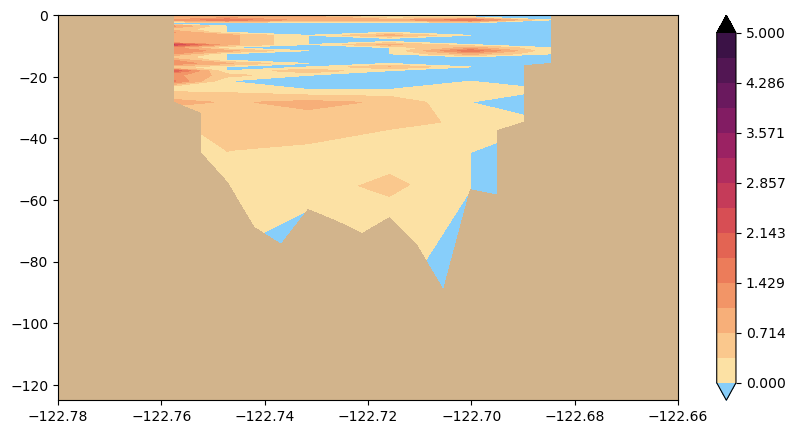

In [26]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
Ni = 3
levels = np.linspace(0, 5, 15)
Lon,Depth = np.meshgrid(coords.nav_lon[ii,::Ni],mask.gdept_0[0,:,ii,0])
Lon2,Depth = np.meshgrid(coords.nav_lon[ii,:],mask.gdept_0[0,:,ii,0])
#Lon,Depth = np.meshgrid(coords.nav_lat[::Ni,jj],mask.gdept_0[0,:,0,jj])
ac = plt.contourf(Lon,-mask.gdept_0[0,:,ii,::Ni],conc1[:,int(ii/3),:],levels=levels,cmap=cmocean.cm.matter,extend='both')
#ac = plt.contourf(Lon,-mask.gdept_0[0,:,::Ni,jj],conc_winter[:,:,int(jj/3)],levels=levels,cmap=cmocean.cm.matter,extend='both')
ax.contourf(Lon2,-mask.gdept_0[0,:,ii,:], mask.tmask[0,:,ii,:], levels=[-0.01, 0.01], colors='tan')
ac.cmap.set_over('black')
ac.cmap.set_under('lightskyblue')
plt.ylim([-125,0])
plt.xlim([-122.78, -122.66])
plt.colorbar(ac)